In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#reading csv file
data = pd.read_csv("Day.csv")

In [3]:
#head of the data 
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#checking rows in both year
data["yr"].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [5]:
#checking shape of the data 
data.shape

(730, 16)

In [6]:
#checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#checking mean of null values
data.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
#Dropping unnecessary Columns 
data.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [9]:
#checking shape again
data.shape

(730, 12)

In [10]:
#converting categorical data from numeric to string for better understanding

#weathersit
def map_weather(x):
  if x==1:
    return 'clear'
  elif x==2:
    return 'mist'
  elif x==3:
    return 'light rain'
  else:
    return 'heavy rain'



#weekday
def map_weekday(x):
  if x==1:
    return 'mon'
  elif x==2:
    return 'tue'
  elif x==3:
    return 'wed'
  elif x==4:
    return 'thur'
  elif x==5:
    return 'fri'
  elif x==6:
    return 'sat'
  else:
    return 'sund'

def map_mnth(x):
  if x==1:
    return 'jan'
  elif x==2:
    return 'feb'
  elif x==3:
    return 'mar'
  elif x==4:
    return 'apr'
  elif x==5:
    return 'may'
  elif x==6:
    return 'jun'
  elif x==7:
    return 'jul'
  elif x==8:
    return 'aug'
  elif x==9:
    return 'sept'
  elif x==10:
    return 'oct'
  elif x==11:
    return 'nov'
  else:
    return 'Dec'

#season

def map_season(x):
  if x==1:
    return 'spring'
  elif x==2:
    return 'summer'
  elif x==3:
    return 'fall'
  else:
    return 'winter'

In [11]:
#conversion

data['weathersit'] = data['weathersit'].apply(map_weather)
data['weekday'] = data['weekday'].apply(map_weekday)
data['mnth'] = data['mnth'].apply(map_mnth)
data['season'] = data['season'].apply(map_season)

In [42]:
#Checking head  
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#converting data into  cat_cols , cont_cols , target

cat_cols=['season','mnth','holiday','weekday','workingday','weathersit','yr']
cont_cols=["temp","atemp","hum","windspeed",]
target=["cnt"] 
len(cat_cols)+len(cont_cols)+len(target)

12

# performing uni-variate analysis

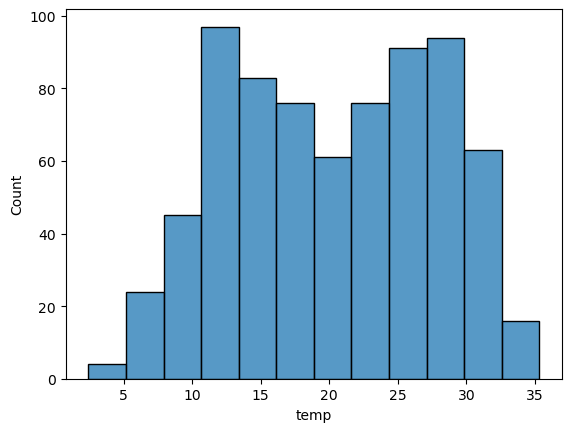

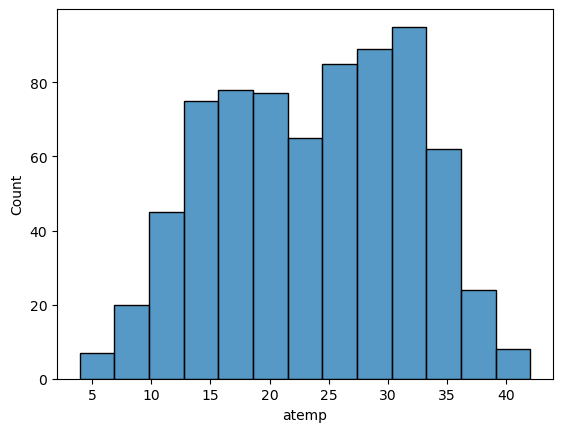

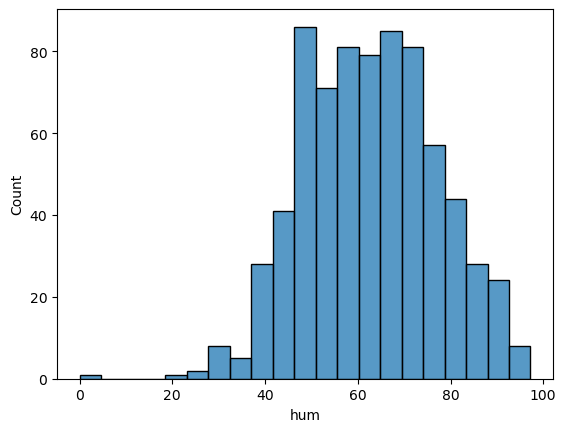

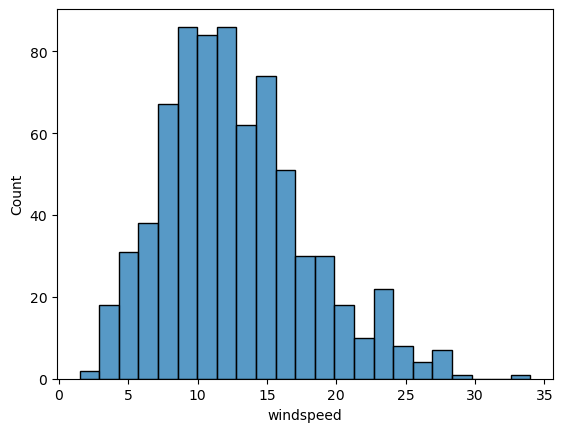

In [14]:
for i in cont_cols: 
    sns.histplot(x=data[i]) 
    
    plt.show()

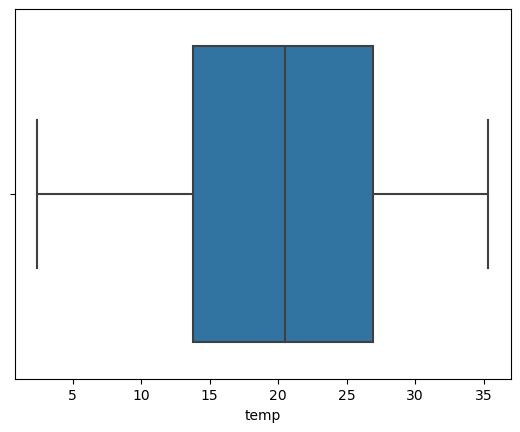

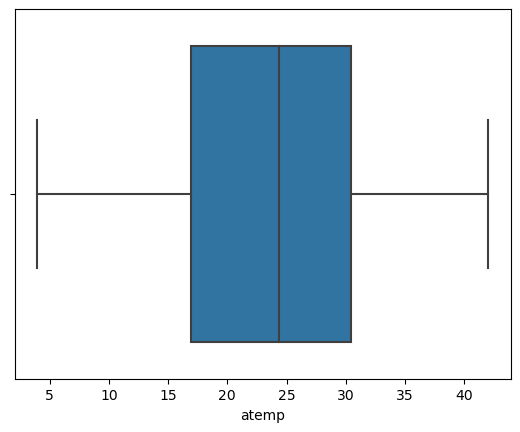

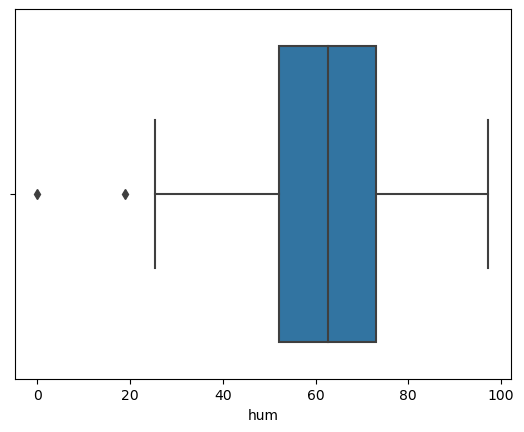

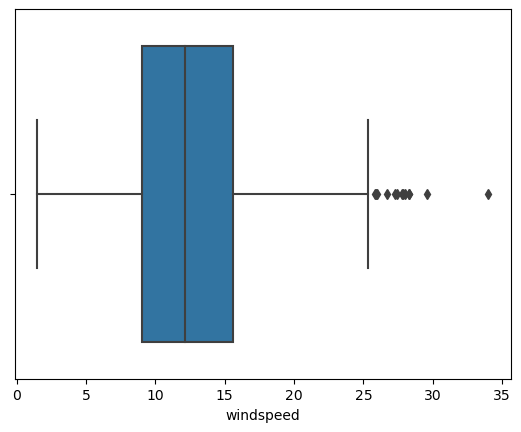

In [15]:
for i in cont_cols: 
    sns.boxplot(x=data[i]) 
    plt.show()

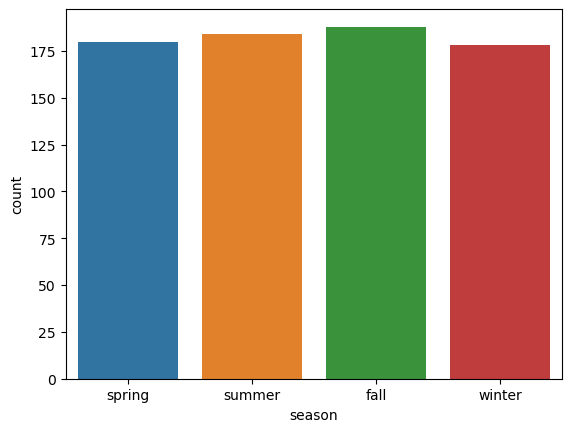

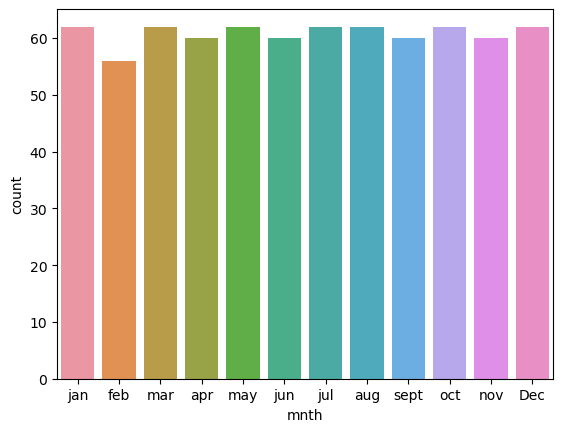

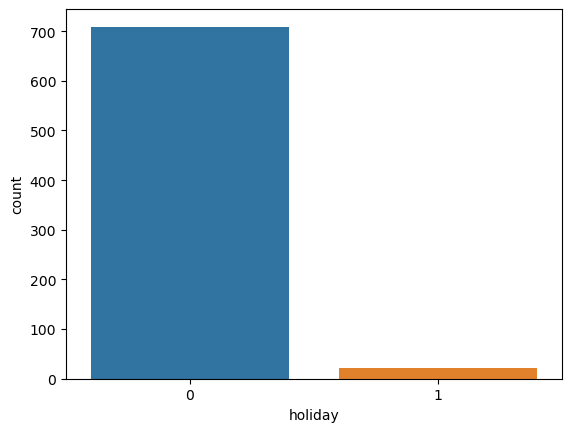

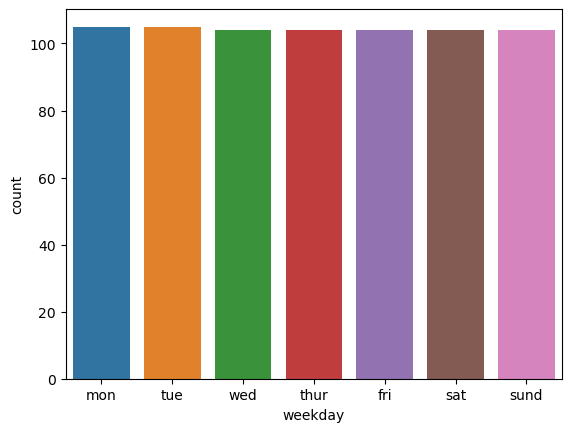

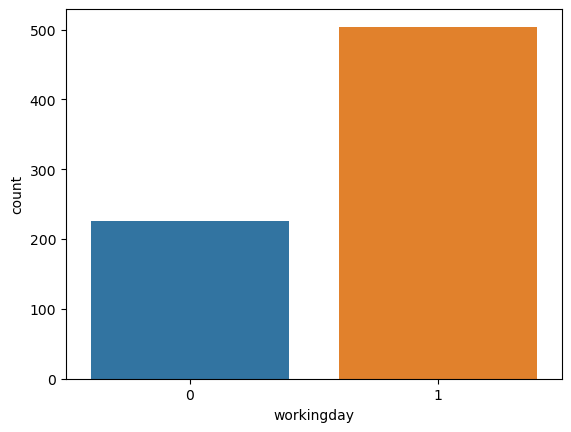

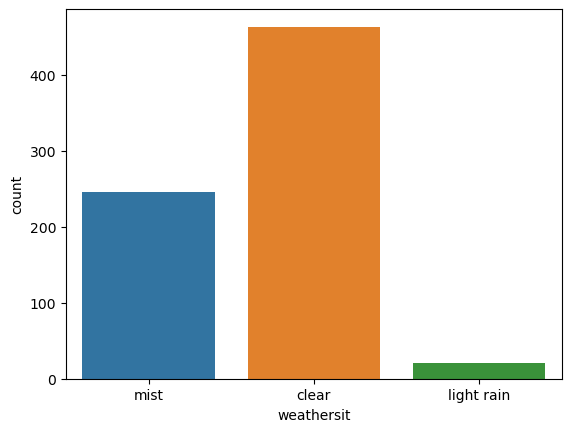

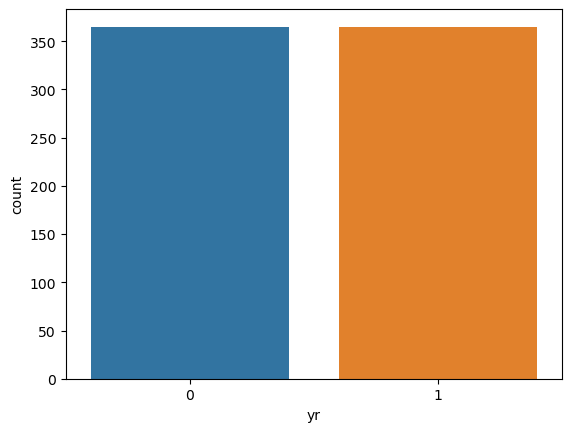

In [16]:
for i in cat_cols: 
    sns.countplot(x=data[i]) 
    
    plt.show()

# performing Bi-variate analysis

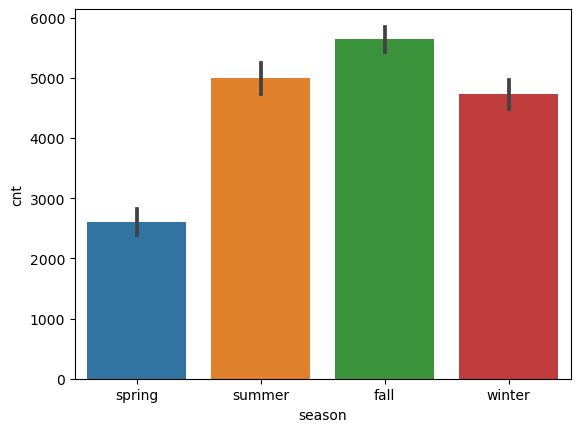

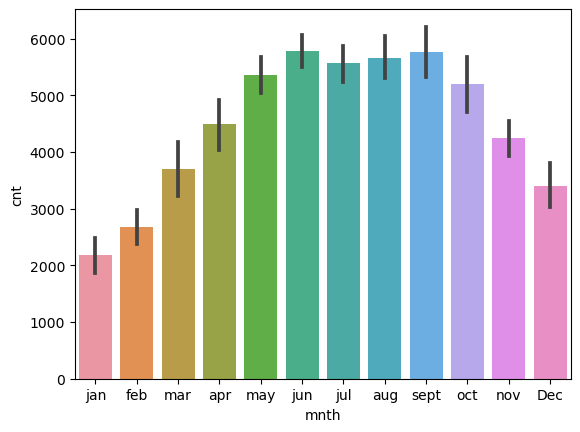

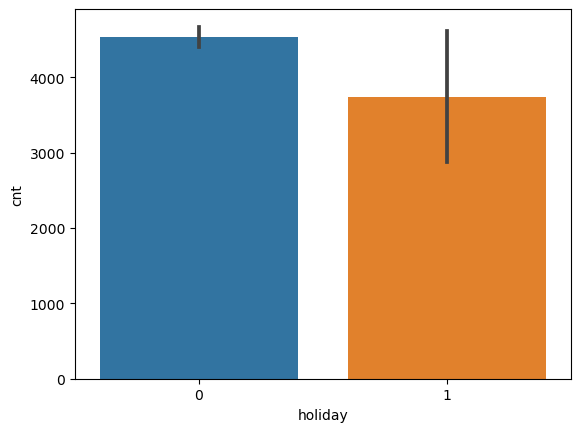

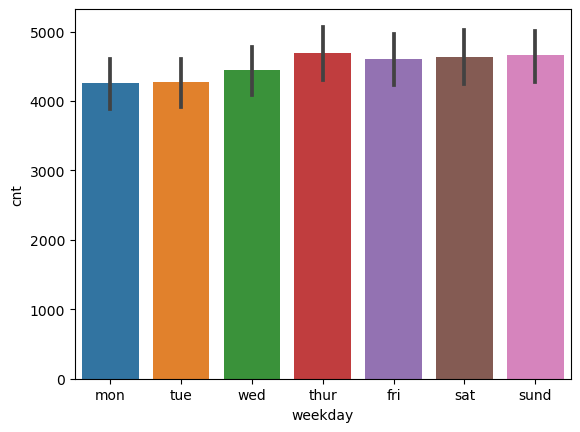

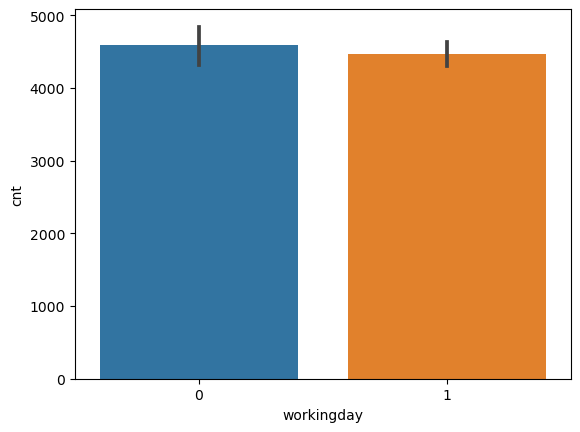

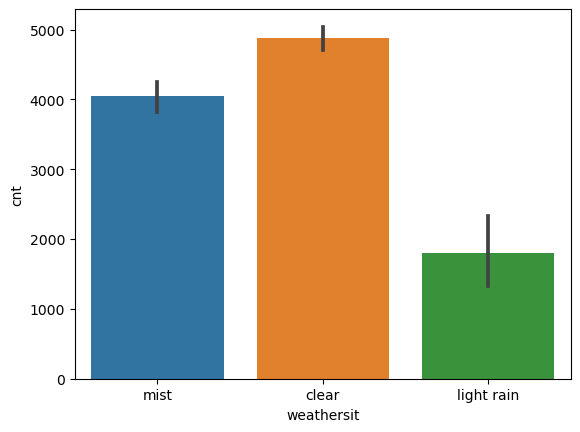

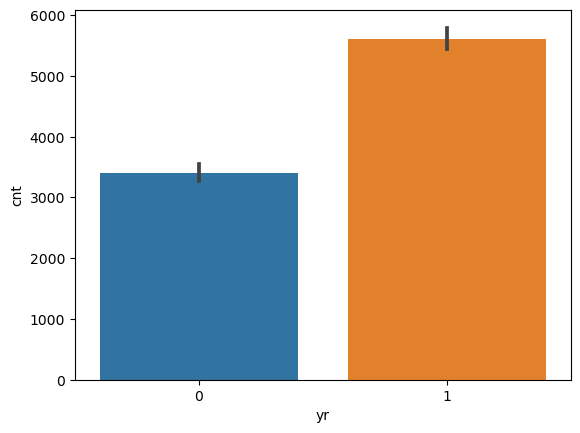

In [17]:
for i in cat_cols:
    sns.barplot(x=i, y='cnt', data=data)
    plt.ylabel('cnt')  # Add a label for the y-axis
    plt.xlabel(i)  # Add a label for the x-axis
    plt.show()

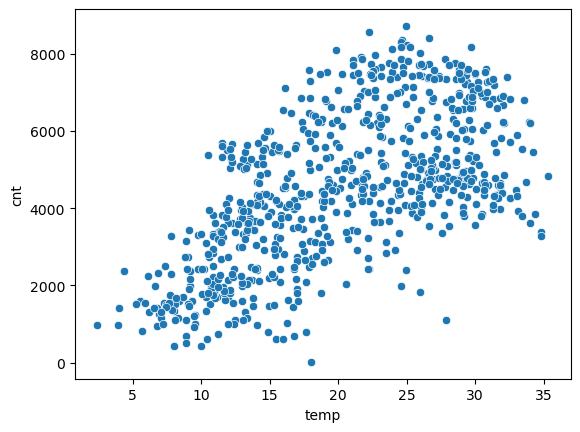

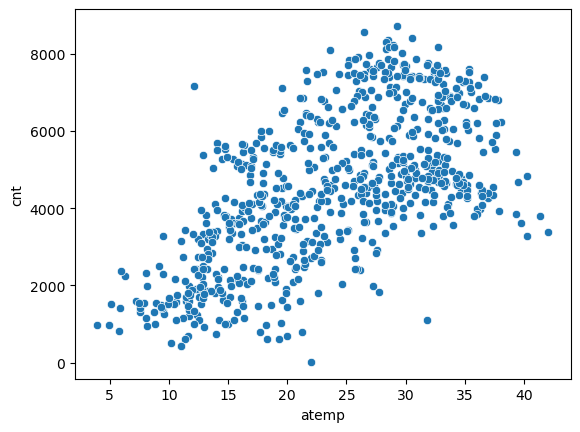

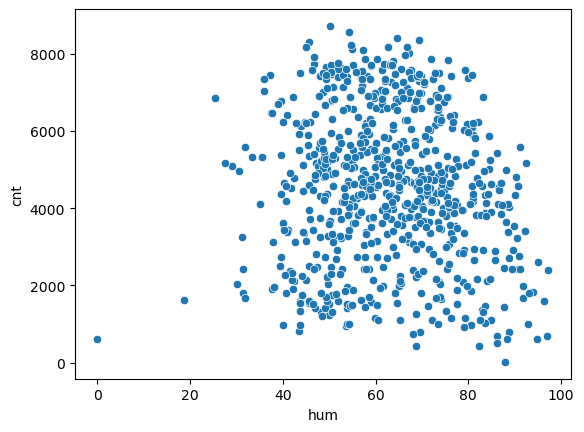

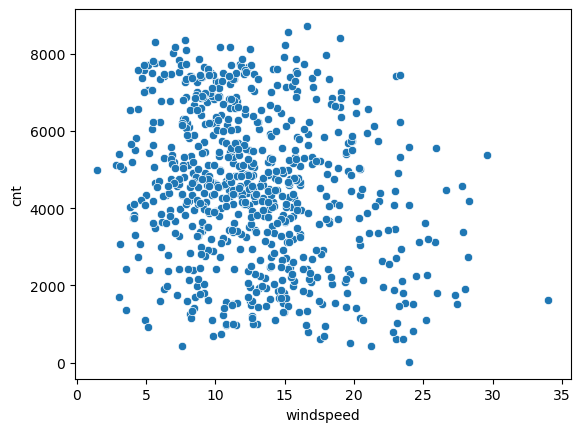

In [104]:
for i in cont_cols:
    sns.scatterplot(data=data, x=i, y='cnt')
    plt.show()

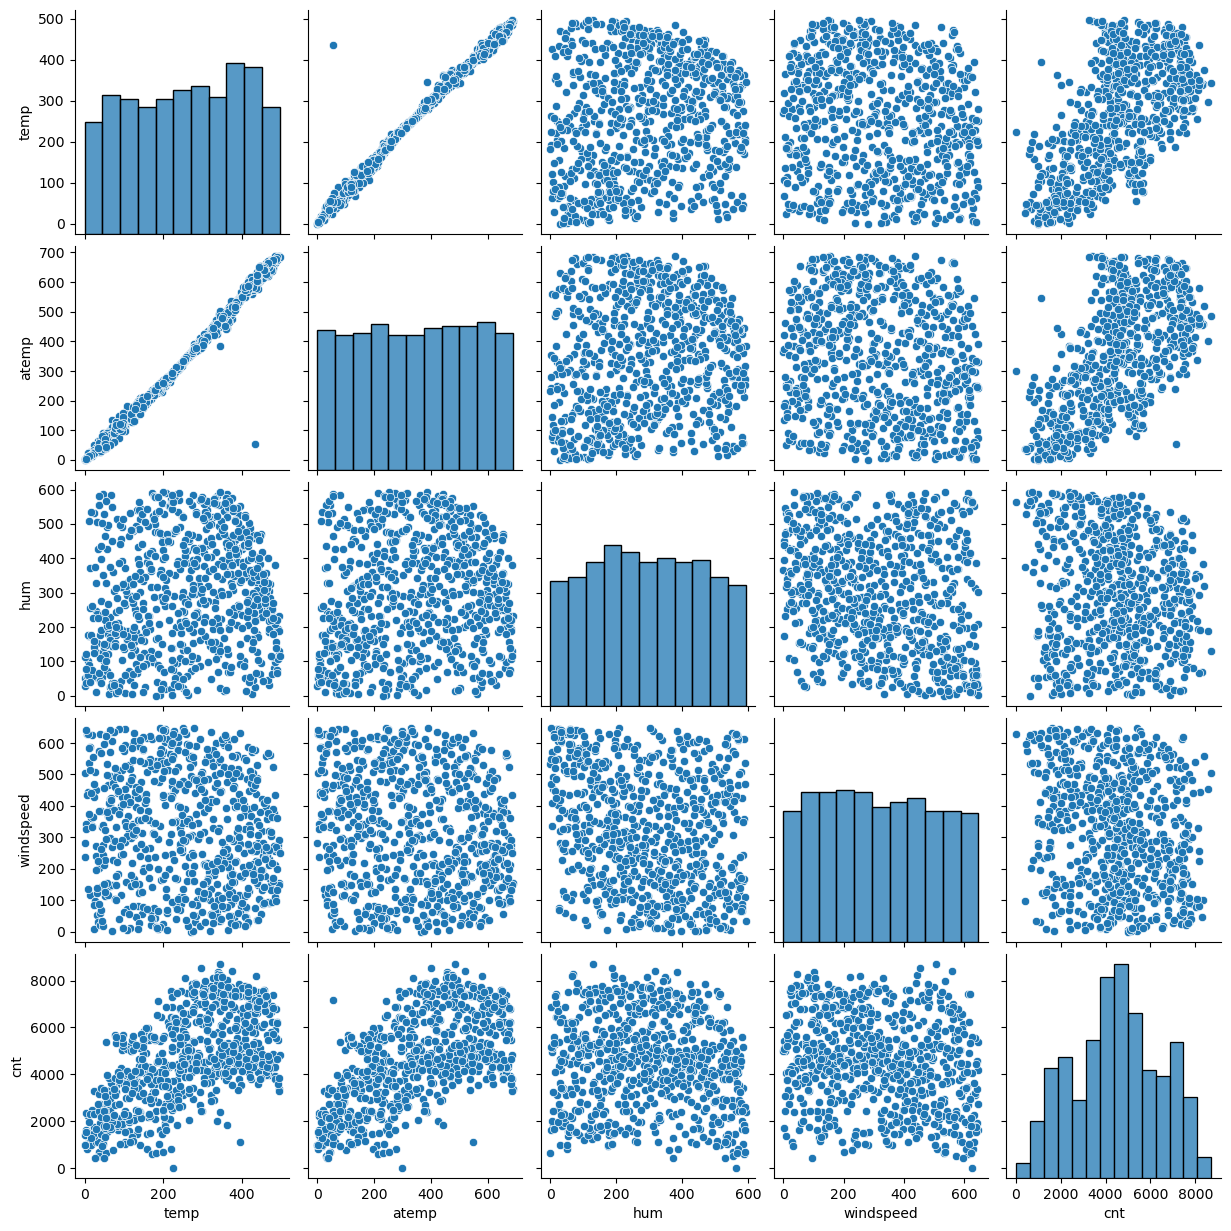

In [107]:
for i in cont_cols:
    # Convert the categorical column into a numeric format, e.g., using label encoding
    data[i] = data[i].astype('category').cat.codes
    
# Create a pair plot
sns.pairplot(data[cont_cols + target])
plt.show()

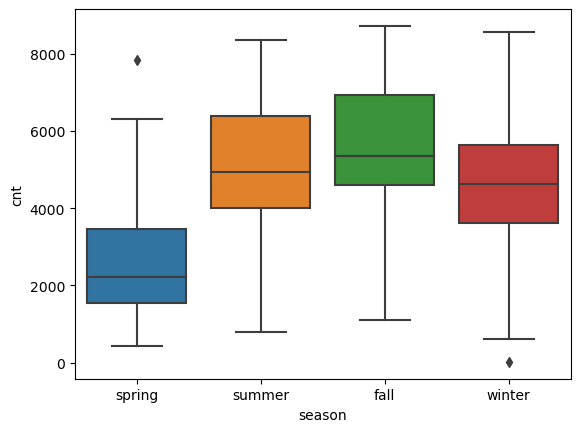

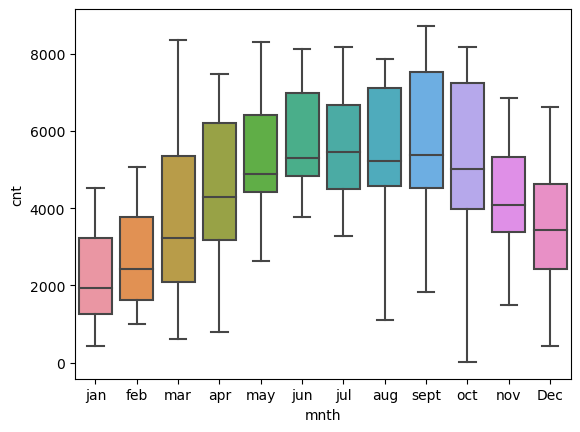

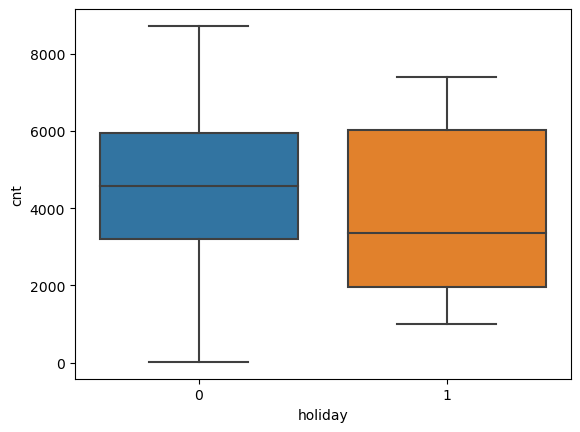

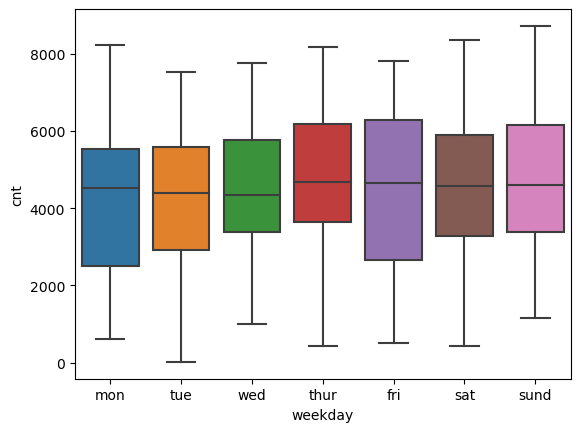

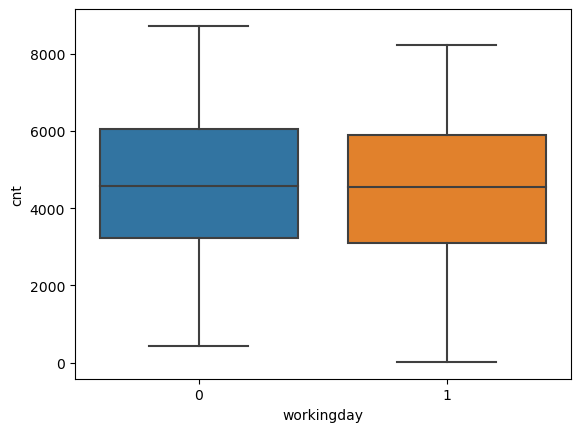

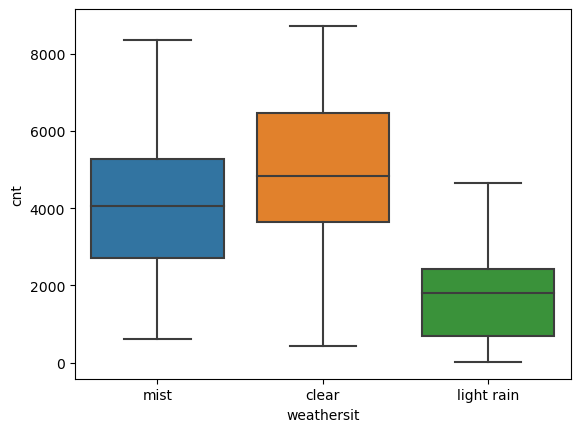

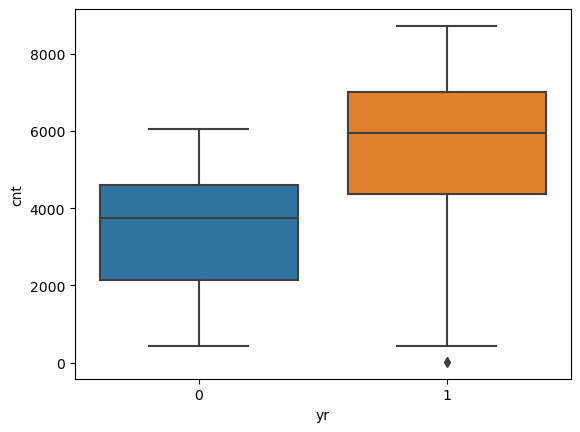

In [19]:
for i in cat_cols: 
    sns.boxplot(x=data[i],y=data["cnt"]) 
    plt.show()

# multivatriate analysis

<AxesSubplot:>

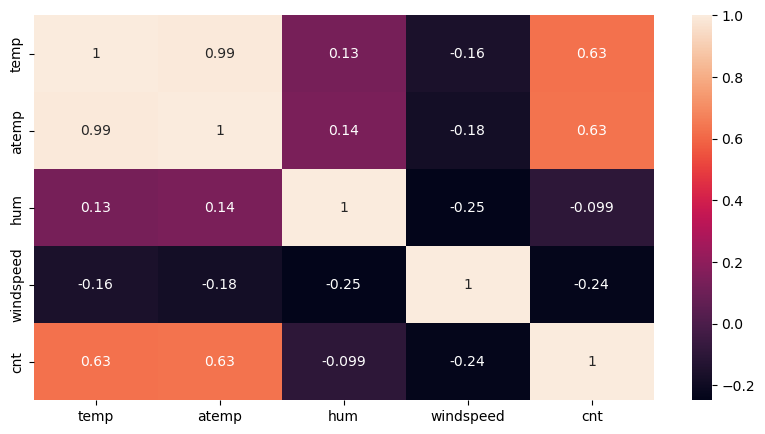

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(data[cont_cols+["cnt"]].corr(),annot=True)

# Dummy Variable Creation (One Hot Encoding)

In [21]:
#checking the unique value as we wont have to make the dummy values for binary variables
data[cat_cols].nunique()

season         4
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
yr             2
dtype: int64

In [70]:
# Dummy encoding
season_dum  = pd.get_dummies(data['season']     ,  drop_first = True)
month_dum   = pd.get_dummies(data['mnth']       ,  drop_first = True)
weekday_dum = pd.get_dummies(data['weekday']    ,  drop_first = True)
weather_dum = pd.get_dummies(data['weathersit'] ,  drop_first = True)

In [71]:
weekday_dum

,mon,sat,sund,thur,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,0,0,0,0,0
726,0,1,0,0,0,0
727,0,0,1,0,0,0
728,1,0,0,0,0,0


In [24]:
#concatinating the data with dummy values
# Concatanating the new columns
data_1 = pd.concat([data, season_dum,month_dum,weekday_dum,weather_dum], axis = 1)
data_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sept,mon,sat,sund,thur,tue,wed,light rain,mist
0,spring,0,jan,0,mon,1,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#dropping the data for which we have created the dummy variable
data_1 = data_1.drop(["season", "mnth", "weekday", "weathersit"], axis=1)

In [26]:
#checking the head
data_1.shape

(730, 30)

In [72]:
data_1.columns 


Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'apr', 'aug', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sund', 'thur',
       'tue', 'wed', 'light rain', 'mist'],
      dtype='object')

# Train Test Split

In [27]:
!pip install -U scikit-learn

In [28]:
X=data_1
y=data_1

In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
train, test = train_test_split(data_1, train_size = 0.7, test_size = 0.3, random_state = 100)
print(test.shape)
print(train.shape)

(219, 30)
(510, 30)


In [30]:
#checking Head of train
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sund,thur,tue,wed,light rain,mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [31]:
#checking Test Shape
test.shape

(219, 30)

In [32]:
#checking Train Shape
train.shape

(510, 30)

# Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()
train[cont_cols +target ] = scaling.fit_transform(train[cont_cols+target])
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sund,thur,tue,wed,light rain,mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [34]:
y_train = train.pop('cnt')
x_train = train

In [45]:
x_train.shape

(510, 29)

# Linear Regression

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [36]:
def create_model(features):
  x_inp = x_train[features]
  # Adding the constant term
  x_inp_c = sm.add_constant(x_inp)
  # training the model
  model = sm.OLS(y_train, x_inp_c).fit()
  print(model.summary())
  return model

# Function to get VIF scores of feature set
def get_VIF(features):
  v = x_train[features]
  vif = pd.DataFrame()
  vif['Features'] = v.columns
  vif['VIF'] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]
  vif['VIF'] = round(vif['VIF'],2)
  print(vif.sort_values(by='VIF',ascending=False))

In [86]:
# Running RFE with the output number of the variable equal to 18
LM = LinearRegression()
LM.fit(x_train, y_train)

# running RFE
rfe = RFE(LM, n_features_to_select=19)
rfe = rfe.fit(x_train, y_train)

In [87]:
#features as per RFE
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'apr', 'aug', 'jun', 'mar', 'may', 'oct',
       'sept', 'light rain', 'mist'],
      dtype='object')

In [88]:
#Features to be ignored as per RFE
x_train.columns[~rfe.support_]

Index(['feb', 'jan', 'jul', 'nov', 'mon', 'sat', 'sund', 'thur', 'tue', 'wed'], dtype='object')

In [52]:
x_train.shape

(510, 29)


# Modelling

In [53]:
# First model created with whatever features suggested by RFE
# Keeping the features suggested by RFE
features = list(x_train.columns[rfe.support_])
model_1 = create_model(features)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.65e-186
Time:                        22:11:12   Log-Likelihood:                 518.97
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     490   BIC:                            -913.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2941      0.037      8.050      0.0

In [54]:
# Getting VIf for all features selected for Model 1
get_VIF(features)

      Features     VIF
3         temp  397.17
4        atemp  377.79
5          hum   31.47
8       summer    8.28
6    windspeed    5.22
7       spring    4.90
9       winter    4.49
2   workingday    3.70
14         may    3.68
10         apr    3.36
12         jun    2.46
18        mist    2.34
0           yr    2.11
11         aug    2.01
13         mar    1.80
15         oct    1.62
16        sept    1.56
17  light rain    1.29
1      holiday    1.13


In [55]:
# Dropping atemp due to high p value.
Feature_set2 = features.copy()
Feature_set2.remove('atemp')

In [56]:
# Second Model with atemp dropped
model_2 = create_model(Feature_set2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.2
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.40e-187
Time:                        22:11:13   Log-Likelihood:                 518.91
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     491   BIC:                            -919.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2937      0.036      8.049      0.0

In [57]:
# VIF for the second model
get_VIF(Feature_set2)

      Features    VIF
4          hum  31.44
3         temp  18.68
7       summer   8.24
5    windspeed   4.94
6       spring   4.86
8       winter   4.41
2   workingday   3.68
13         may   3.68
9          apr   3.35
11         jun   2.45
17        mist   2.34
0           yr   2.11
10         aug   1.98
12         mar   1.80
14         oct   1.62
15        sept   1.56
16  light rain   1.28
1      holiday   1.13


In [58]:
# Dropping summer due to high p value.
Feature_set3 = Feature_set2.copy()
Feature_set3.remove('summer')

In [59]:
# Second Model with summer dropped
model_3 = create_model(Feature_set3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          4.33e-188
Time:                        22:11:14   Log-Likelihood:                 517.46
No. Observations:                 510   AIC:                            -998.9
Df Residuals:                     492   BIC:                            -922.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3150      0.034      9.204      0.0

In [60]:
get_VIF(Feature_set3)

      Features    VIF
4          hum  27.14
3         temp  16.59
5    windspeed   4.73
7       winter   3.87
2   workingday   3.67
6       spring   3.66
16        mist   2.32
0           yr   2.09
9          aug   1.95
12         may   1.78
8          apr   1.71
10         jun   1.68
13         oct   1.62
14        sept   1.54
11         mar   1.36
15  light rain   1.26
1      holiday   1.12


In [75]:
# Dropping hum due to high p value.
Feature_set4 = Feature_set3.copy()
Feature_set4.remove('hum')

In [62]:
model_4 = create_model(Feature_set4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.35e-185
Time:                        22:11:14   Log-Likelihood:                 508.80
No. Observations:                 510   AIC:                            -983.6
Df Residuals:                     493   BIC:                            -911.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2337      0.028      8.221      0.0

In [76]:
get_VIF(Feature_set4)

      Features   VIF
3         temp  7.48
4    windspeed  4.71
2   workingday  3.51
6       winter  2.57
5       spring  2.31
0           yr  2.09
8          aug  1.94
9          jun  1.68
11         may  1.62
12         oct  1.61
7          apr  1.57
15        mist  1.55
13        sept  1.50
10         mar  1.35
1      holiday  1.12
14  light rain  1.10


In [77]:
# Dropping apr due to high p value.
Feature_set5 = Feature_set4.copy()
Feature_set5.remove("apr")   

In [78]:
model_5 = create_model(Feature_set5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     170.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          4.39e-184
Time:                        11:45:35   Log-Likelihood:                 502.49
No. Observations:                 510   AIC:                            -973.0
Df Residuals:                     494   BIC:                            -905.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2798      0.026     10.965      0.0

In [79]:
get_VIF(Feature_set5)

      Features   VIF
3         temp  7.38
4    windspeed  4.15
2   workingday  3.42
6       winter  2.24
0           yr  2.06
5       spring  1.97
7          aug  1.74
11         oct  1.61
14        mist  1.54
8          jun  1.52
10         may  1.45
12        sept  1.41
9          mar  1.30
1      holiday  1.11
13  light rain  1.10


In [80]:
# Dropping aug due to high p value.
Feature_set6 = Feature_set5.copy()
Feature_set6.remove("aug")

In [81]:
model_6 = create_model(Feature_set6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.2
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.77e-184
Time:                        11:46:16   Log-Likelihood:                 500.72
No. Observations:                 510   AIC:                            -971.4
Df Residuals:                     495   BIC:                            -907.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2782      0.026     10.882      0.0

In [82]:
get_VIF(Feature_set6)

      Features   VIF
3         temp  5.44
4    windspeed  4.10
2   workingday  3.42
6       winter  2.13
0           yr  2.06
5       spring  1.94
10         oct  1.59
13        mist  1.53
7          jun  1.31
8          mar  1.27
9          may  1.27
11        sept  1.25
1      holiday  1.11
12  light rain  1.10


In [83]:
# Dropping jun due to high p value.
Feature_set7 = Feature_set6.copy()
Feature_set7.remove("jun")

In [84]:
model_7 = create_model(Feature_set7)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          4.91e-185
Time:                        11:46:55   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -970.6
Df Residuals:                     496   BIC:                            -911.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2787      0.026     10.882      0.0

In [108]:
get_VIF(Feature_set7)

      Features   VIF
3         temp  4.90
4    windspeed  4.10
2   workingday  3.42
6       winter  2.09
0           yr  2.06
5       spring  1.92
9          oct  1.59
12        mist  1.52
7          mar  1.26
8          may  1.22
10        sept  1.21
1      holiday  1.11
11  light rain  1.10


In [89]:
# Dropping mist due to high p value.
Feature_set8 = Feature_set7.copy()
Feature_set8.remove("mist")

In [90]:
model_8 = create_model(Feature_set8)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     172.5
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.84e-168
Time:                        11:49:18   Log-Likelihood:                 457.18
No. Observations:                 510   AIC:                            -888.4
Df Residuals:                     497   BIC:                            -833.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2233      0.027      8.256      0.0

In [91]:
get_VIF(Feature_set8)

      Features   VIF
3         temp  4.80
4    windspeed  4.08
2   workingday  3.42
0           yr  2.06
6       winter  2.04
5       spring  1.87
9          oct  1.59
7          mar  1.26
8          may  1.20
10        sept  1.20
1      holiday  1.11
11  light rain  1.08


Based on all the circumstances, we have chosen to proceed with Model 7 for further analysis.

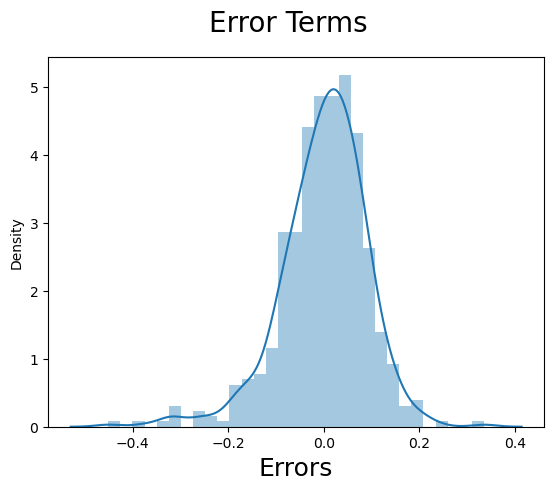

In [92]:
# Using SkLearn to rebuild the model with the finalised set of features for training
final_model = LinearRegression()
final_model.fit(x_train[Feature_set7],y_train)

# Prediction process
y_train_pred = final_model.predict(x_train[Feature_set7])
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [93]:
from sklearn.metrics import r2_score
# R2 score on the Train data
r2_score(y_train,y_train_pred)

0.8358550176596571

In [95]:
test[cont_cols+target] = scaling.transform(test[cont_cols+target])
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sept,mon,sat,sund,thur,tue,wed,light rain,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [96]:
y_test = test.pop('cnt')
x_test = test

In [97]:
# Considering only the features that are significant according to model_5
x_test_input = x_test[Feature_set7]

In [98]:
# Prediction on test inputs
y_test_pred = final_model.predict(x_test_input)

In [109]:
# R2 score on the Test data
r2_score(y_test,y_test_pred)

0.8197184192922415

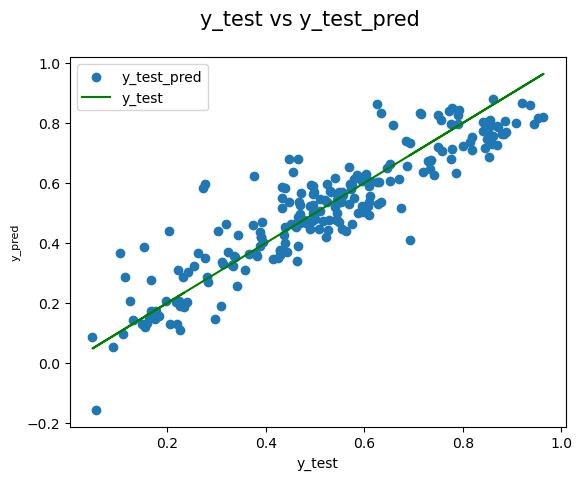

In [100]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred,label='y_test_pred')
plt.plot(y_test,y_test,color = 'green',label='y_test')
fig.suptitle('y_test vs y_test_pred', fontsize=15)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=8)
plt.legend()
plt.show()

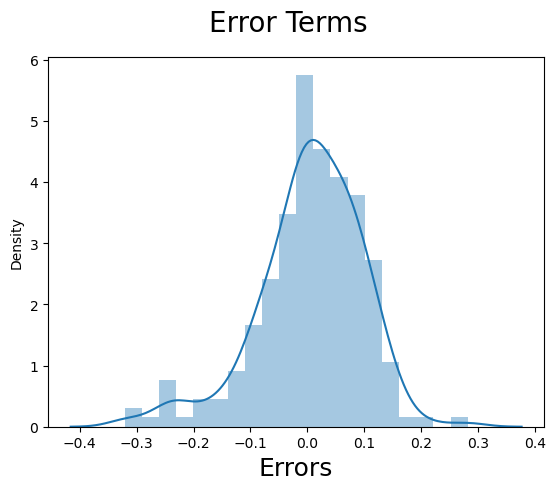

In [101]:
# Residual analysis on test data set
fig = plt.figure()
sns.distplot((y_test-y_test_pred),bins =20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

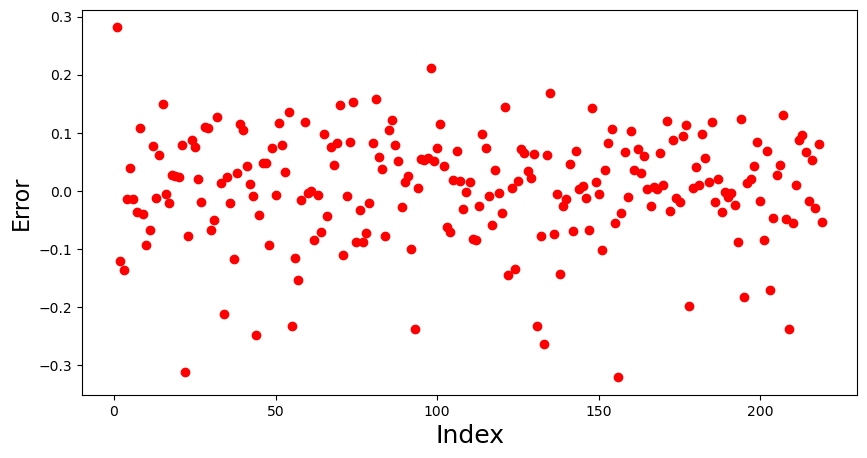

In [102]:
# Plotting the Error in test prediction
fig = plt.figure(figsize=(10,5))
xaxis = [i for i in range(1,len(y_test)+1)]
plt.plot(xaxis,y_test-y_test_pred,color="red", marker='o',linestyle="")
plt.xlabel('Index', fontsize=18)
plt.ylabel('Error', fontsize=16)
plt.show()

The errors are entirely random and do not exhibit any discernible patterns. Therefore, the developed model can effectively account for all the patterns present in the test dataset.